In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import time


In [2]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('data/', kind='train')
X_test, y_test = load_mnist('data/', kind='t10k')


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [4]:
def measure_elapsed_time (start_time):
    elapsed_time = time.time() - start_time

    print("Elapsed time: %.2f seconds" % elapsed_time)

# Part 1. Principal Component Analysis

In [5]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

start_time = time.time()

rf.fit(X_train, y_train)

measure_elapsed_time(start_time)


Elapsed time: 8.95 seconds


In [6]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)

print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))


Accuracy: 56.78 %


In [7]:
# Next, use PCA to reduce the dataset's dimensionality (with an explained variance ratio of 95%).
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

start_time = time.time()

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

measure_elapsed_time(start_time)

X_train_reduced.shape, X_test_reduced.shape


Elapsed time: 5.10 seconds


((60000, 187), (10000, 187))

In [8]:

start_time = time.time()

rf.fit(X_train_reduced, y_train)

measure_elapsed_time(start_time)

y_pred = rf.predict(X_test_reduced)

print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))

Elapsed time: 16.21 seconds
Accuracy: 67.23 %


Against my expecations the training time doubled altough the dimenions of the training set have been reduced. This should not happen as the model needs to process less data and therefore should be faster.
The accuracy on the other side went up by using Principal Component Analysis. This is because the model has less dimensions to process and therefore can focus on the important features. This leads to a better accuracy.

In [ ]:
# Apply softmax regression (using the X_train dataset) and time how long it takes, then evaluate the resulting model on the test set. Use LogisticRegression with multi_class set to "multinomial".
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", random_state=42)

start_time = time.time()

softmax_reg.fit(X_train, y_train)

measure_elapsed_time(start_time)

y_pred = softmax_reg.predict(X_test)

print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))


Elapsed time: 33.89 seconds
Accuracy: 84.12 %


/home/niklas/uni/semester7/dasc2/projects/assignments/dasc2_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Use softmax regression (with the reduced dataset) and time how long it takes. Was training much faster? By how much?

softmax_reg = LogisticRegression(multi_class="multinomial", random_state=42)

start_time = time.time()

softmax_reg.fit(X_train_reduced, y_train)

measure_elapsed_time(start_time)

y_pred = softmax_reg.predict(X_test_reduced)

print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))

Elapsed time: 12.52 seconds
Accuracy: 84.25 %


/home/niklas/uni/semester7/dasc2/projects/assignments/dasc2_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In this case the accuracy stays almost the same (0.13% higher) altough the training time is much faster (2.8 times faster). This is because the model has less dimensions to process and therefore can focus on the important features. But although the training time is faster the accuracy is almost the same. This is because the model has less dimensions to process and therefore can focus on the important features. This prevents overfitting and therefore leads to a better accuracy.
PCA is a good way to reduce the dimensions of the training set and therefore the training time. It also prevents overfitting and therefore leads to a better accuracy.

# Part 2. Dimensionality reduction with t-SNE


In [ ]:
# Take a random subset of 12,500 images (x_train_small and y_train_small)
np.random.seed(42)

m = 12500
indices = np.random.permutation(60000)[:m]

X_train_small = X_train[indices]
y_train_small = y_train[indices]

X_train_small.shape, y_train_small.shape

((12500, 784), (12500,))

In [ ]:
# Now let's use t-SNE to reduce dimensionality down to 2D. Hint use sklearn manifold library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

start_time = time.time()

X_train_small_tsne = tsne.fit_transform(X_train_small)

measure_elapsed_time(start_time)

X_train_small_tsne.shape

Elapsed time: 29.77 seconds


(12500, 2)

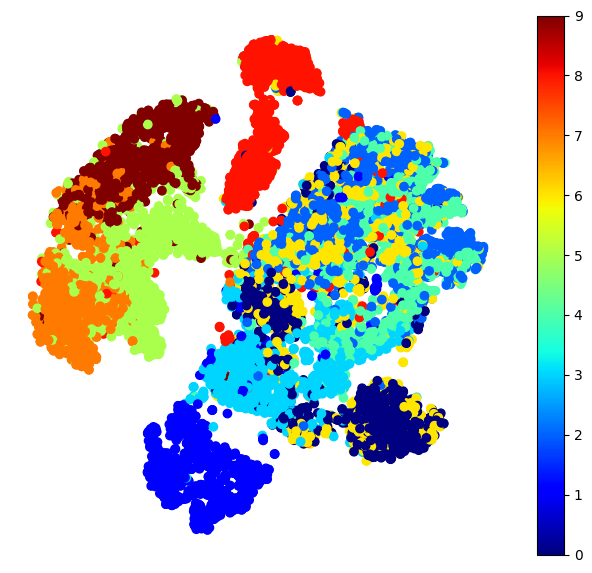

In [ ]:
# Plot a scatterplot using different colours for each class (T-shirt, trouser, Pullover etc.).

plt.figure(figsize=(8,7))
plt.scatter(X_train_small_tsne[:, 0], X_train_small_tsne[:, 1], c=y_train_small, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


Elapsed time: 8.11 seconds


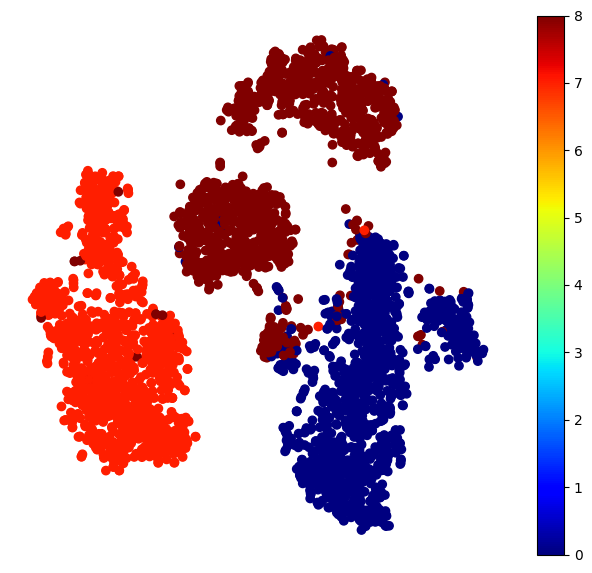

In [ ]:
selected_classes_indices = np.where(np.isin(y_train_small, [7, 8, 0]))[0]

X_train_small_subset = X_train_small[selected_classes_indices]
y_train_small_subset = y_train_small[selected_classes_indices]

start_time = time.time()

X_train_small_subset_tsne = tsne.fit_transform(X_train_small_subset)

measure_elapsed_time(start_time)

plt.figure(figsize=(8,7))
plt.scatter(X_train_small_subset_tsne[:, 0], X_train_small_subset_tsne[:, 1], c=y_train_small_subset, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()